In [14]:
import pandas as pd
# import geopandas as gp
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from mpl_toolkits.basemap import Basemap
from pylab import *
from matplotlib.colors import rgb2hex
from mpl_toolkits.axes_grid1 import make_axes_locatable
# from cartopy.mpl.ticker import LongitudeFormatter,LatitudeFormatter
import matplotlib.patches as mpatches
from matplotlib import pylab
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.patches import PathPatch
import matplotlib.ticker as mticker
import matplotlib.ticker as ticker
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import LogNorm
# from cmcrameri import cm
from matplotlib import cm
from matplotlib.colors import ListedColormap
import matplotlib.colors as colors
plt.rcParams['axes.unicode_minus']=False#负号
plt.rcParams['font.sans-serif']=['Arial']###############
plt.rcParams['font.size'] = '7' # 设置字体大小 = '16' # 设置字体大小
# plt.rcParams["font.weight"] = "bold"
# plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams['xtick.direction'] = 'in'#将x周的刻度线方向设置向内
plt.rcParams['ytick.direction'] = 'in'#将y轴的刻度方向设置向内
import shapefile as shpfile
import xlrd
import geopandas as gpd
import os
from matplotlib.legend import Legend
import scipy.stats as stats
import matplotlib.lines as mlines
from scipy.stats import gaussian_kde
# import seaborn as sns
import matplotlib.patches as patches
import locale

In [2]:
version='v16_250104'
output_dir = os.path.join(r'J:\lakemapping\postprocess',version)
auxiliary_dataset_gdb=r'J:\lakemapping\auxiliary_dataset.gdb'
eight_continents=['Asia','Siberia','Africa','Europe','Oceania_Anta','North_America','Arctic','South_America']
fig_path=r'D:\lakemapping\10_paper_writting\figure\v6_250321'
os.makedirs(fig_path,exist_ok=True)

In [3]:
# sample_dir=r'D:\lakemapping\2_dataset\sampleAnnotations\SampleV8'
sample_dir=r'D:\lakemapping\3_training\U-Net_for_publish\SampleAnnotations\5type_edit'
region_file=os.path.join(sample_dir,'total_regions.shp')
label_file=os.path.join(sample_dir,'total_polygons.shp')

In [4]:
color_list=['#B8DBB3','#72B063','#E29135','#94C6CD','#719AAC','#4A5F7E']#浅绿，深绿，橙色，浅蓝，中蓝，深蓝
label_list=['0.005~0.01 ${km^2}$','0.01~0.03 ${km^2}$','0.03~0.1 ${km^2}$','0.1~1 ${km^2}$','>1 ${km^2}$']
sub_fig_name=['a','b','c','d','e']

In [5]:
global_diss=r'D:\lakemapping\0_auxiliary_data\World_Continents\world_vector\World_continents_dissolve.shp'

In [6]:
sample_region=gpd.read_file(region_file)
sample_label=gpd.read_file(label_file)

In [7]:
train_s=sample_region[sample_region['dataset']=='train']
val_s=sample_region[sample_region['dataset']=='val']
test_s=sample_region[sample_region['dataset']=='test']

# train_p=sample_label[sample_label['dataset']=='train']
# val_p=sample_label[sample_label['dataset']=='val']
# test_p=sample_label[sample_label['dataset']=='test']

C:\Users\lenovo\AppData\Local\Temp\ipykernel_49500\2214050159.py:11: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  sample_region['centroid'] = sample_region.geometry.centroid
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


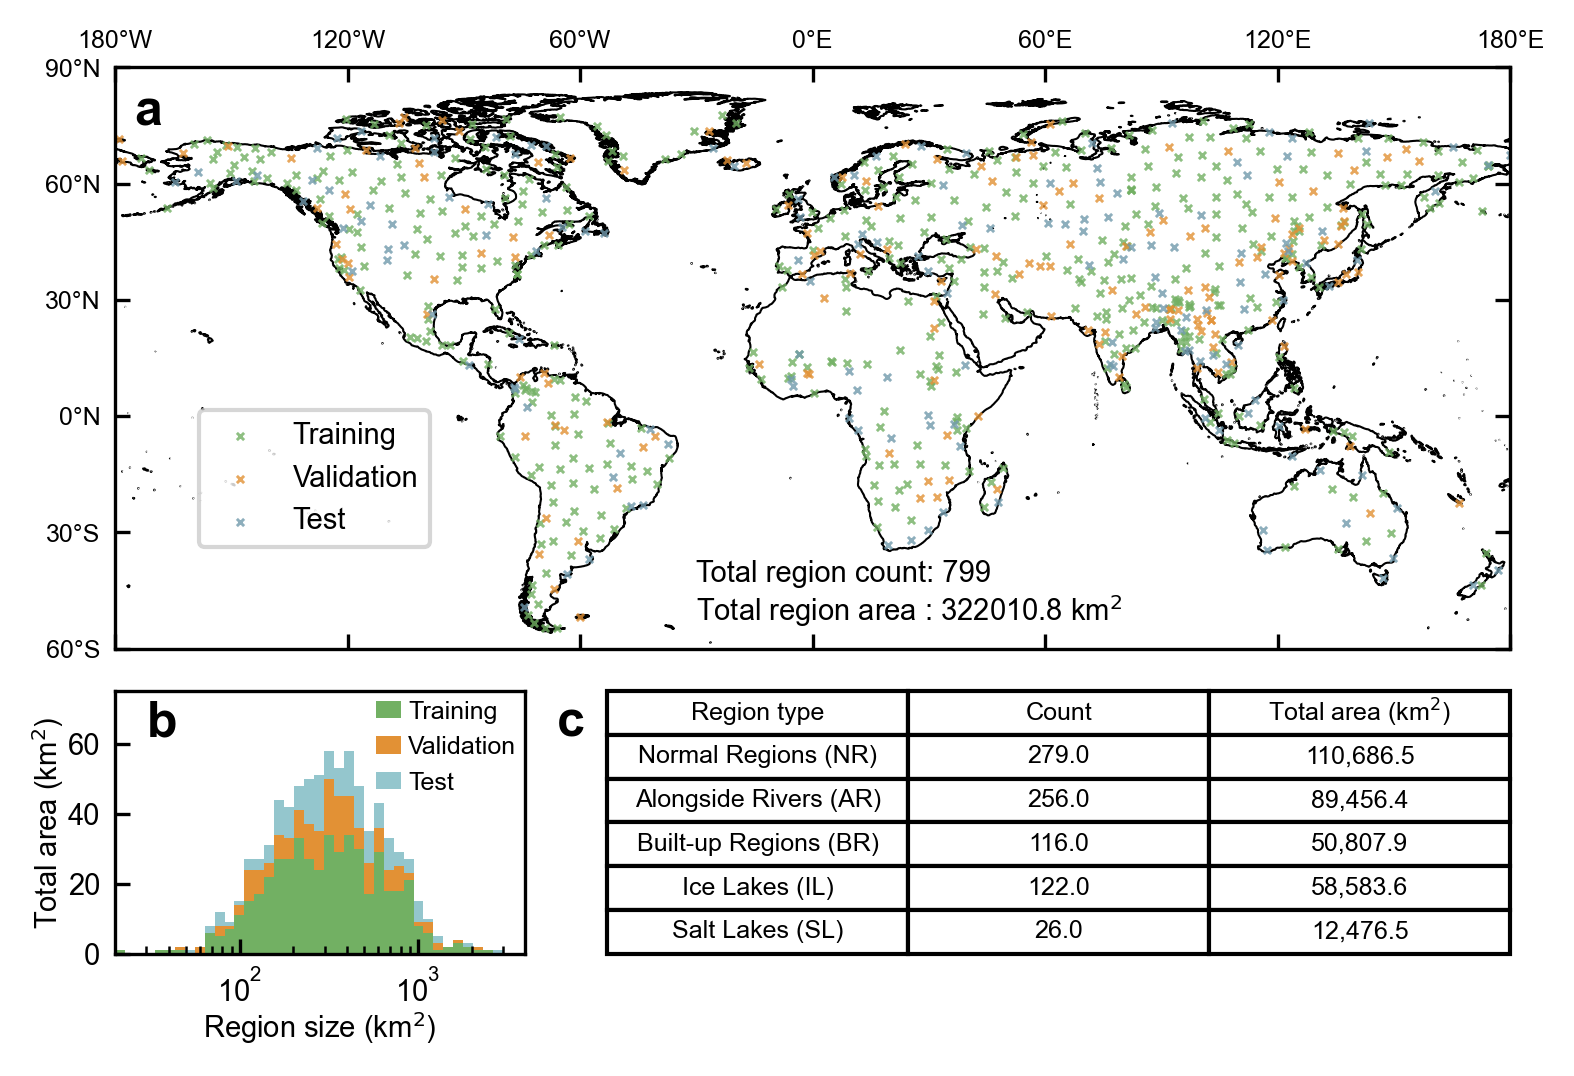

In [21]:
savepic=fig_path+'/Figure2_sample_istribution.eps'
fig=plt.figure(figsize=(6,4),dpi=300)#fig=plt.figure(figsize=(18,7.9))
gs = gridspec.GridSpec(2,3,width_ratios=[1,1,1],height_ratios=[2.5,1],wspace =0.2,hspace =0.01)
ax1=plt.subplot(gs[0, :])
map1 = Basemap( llcrnrlat=-60, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180,ax=ax1)
map1.readshapefile(global_diss[:-4],'global_diss',drawbounds=True,color='k',linewidth=0.5,zorder=1)

# map1.drawmeridians(np.arange(0, 360, 60),labels=[0,0,0,1],color='darkgrey', linewidth=0.5,dashes=[5, 5])#绘制经线
# map1.drawparallels(np.arange(-30, 90, 30),labels=[0,1,0,0],color='darkgrey', linewidth=0.5,dashes=[5, 5])#绘制纬线

sample_region['centroid'] = sample_region.geometry.centroid
size_column = 'area'
label_column = 'dataset' 

# 提取中心点坐标
x = sample_region['centroid'].x
y = sample_region['centroid'].y

color_mapping = {
    'train':color_list[1],# 'DimGrey',
    'val':color_list[2],#'Grey',
    'test': color_list[4],#'LightGray'
}
ax1.set_xticks(np.arange(-180, 181, 60))
ax1.set_yticks(np.arange(-60, 91, 30))
ax1.set_xticklabels([f'{abs(x)}°W' if x < 0 else f'{abs(x)}°E' for x in np.arange(-180, 181, 60)],fontsize=6) 
ax1.set_yticklabels([f'{abs(y)}°S' if y < 0 else f'{abs(y)}°N' for y in np.arange(-60, 91, 30)],fontsize=6)
ax1.xaxis.set_tick_params(labeltop=True, labelbottom=False)
plt.tick_params(bottom=True, top=True, left=True, right=True )
# pie_size=[]
# 遍历类别进行绘制
for category, color in color_mapping.items():
    subset = sample_region[sample_region['dataset'] == category]
    if category=='train':
        label='Training'
    elif category=='val':
        label='Validation'
    else:
        label='Test'
    ax1.scatter(
        subset['centroid'].x,
        subset['centroid'].y,
        c=color,
        label=label,  # 为图例添加标签
        s=3,#subset['value'],  # 点大小
        marker='x',
#         edgecolor=color,  # 边框颜色
        linewidth=0.7,
        alpha=0.8
    )
#     pie_size.append(subset['area'].sum())#len(subset)

# 添加图例
ax1.legend(title=None, loc="lower left",bbox_to_anchor=(0.05, 0.15))
total_area=sample_region['area'].sum()
ax1.text(-175,75,sub_fig_name[0],fontsize=12,weight='bold')
ax1.text(-30,-55,f'Total region count: {len(sample_region)}\nTotal region area : {total_area:.1f} km$^2$', ha='left', va='bottom',
        bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.1'))
# ax_pie=ax1.inset_axes((0, 0.1,0.2,0.4)) 
# ax_pie.pie(pie_size, labels=color_mapping.keys(), colors=color_mapping.values(), autopct='%1.1f%%', startangle=140)
# ax_pie.set_xlabel('Total region area')

ax2 = plt.subplot(gs[1, 0])
ax2.text(30,62,sub_fig_name[1],fontsize=12,weight='bold')
bins=np.logspace(np.log10(20), np.log10(3000), 40)
ax2.hist([train_s['area'],val_s['area'],test_s['area']],bins=bins,stacked=True,color=color_list[1:4],label=['Training', 'Validation', 'Test'])
ax2.set_xscale('log')  # 设置x轴为对数尺度
ax2.set_xlim(20,4000)
ax2.set_ylim(0,75)
# ax2.set_xticks([20,100,1000,3000])
ax2.set_xlabel('Region size (km$^2$)', labelpad=0.5)#, backgroundcolor='white'
# ax2.yaxis.label.set_backgroundcolor('white')
ax2.set_ylabel('Total area (km$^2$)', labelpad=0.5)
ax2.text(6000,62,sub_fig_name[2],fontsize=12,weight='bold')
ax2.legend(fontsize=6,frameon=False,handlelength=1,handletextpad=0.3,loc="upper left",bbox_to_anchor=(0.58, 1.05))
ax3=plt.subplot(gs[1, 1:])
table_data=pd.read_excel(r'D:\lakemapping\10_paper_writting\figure\train_data_distribution.xlsx',sheet_name='five_type')
# 设置千分位分隔符
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')  # 根据你的系统区域设置进行调整
# 格式化数值为千分位分隔符
formatted_data = table_data.applymap(lambda x: locale.format_string("%.1f", x, grouping=True) if isinstance(x, (int, float)) else x)

table=ax3.table(cellText=formatted_data.values, colLabels=formatted_data.columns, loc='bottom', cellLoc='center', bbox=[0.0, 0, 1.0, 1])
table[(0, 2)].set_text_props(text='Total area (km$^2$)')
ax3.set_axis_off()

plt.savefig(savepic,dpi=300,bbox_inches='tight')#,dpi=400
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_49500\1883528901.py:12: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  sample_region['centroid'] = sample_region.geometry.centroid


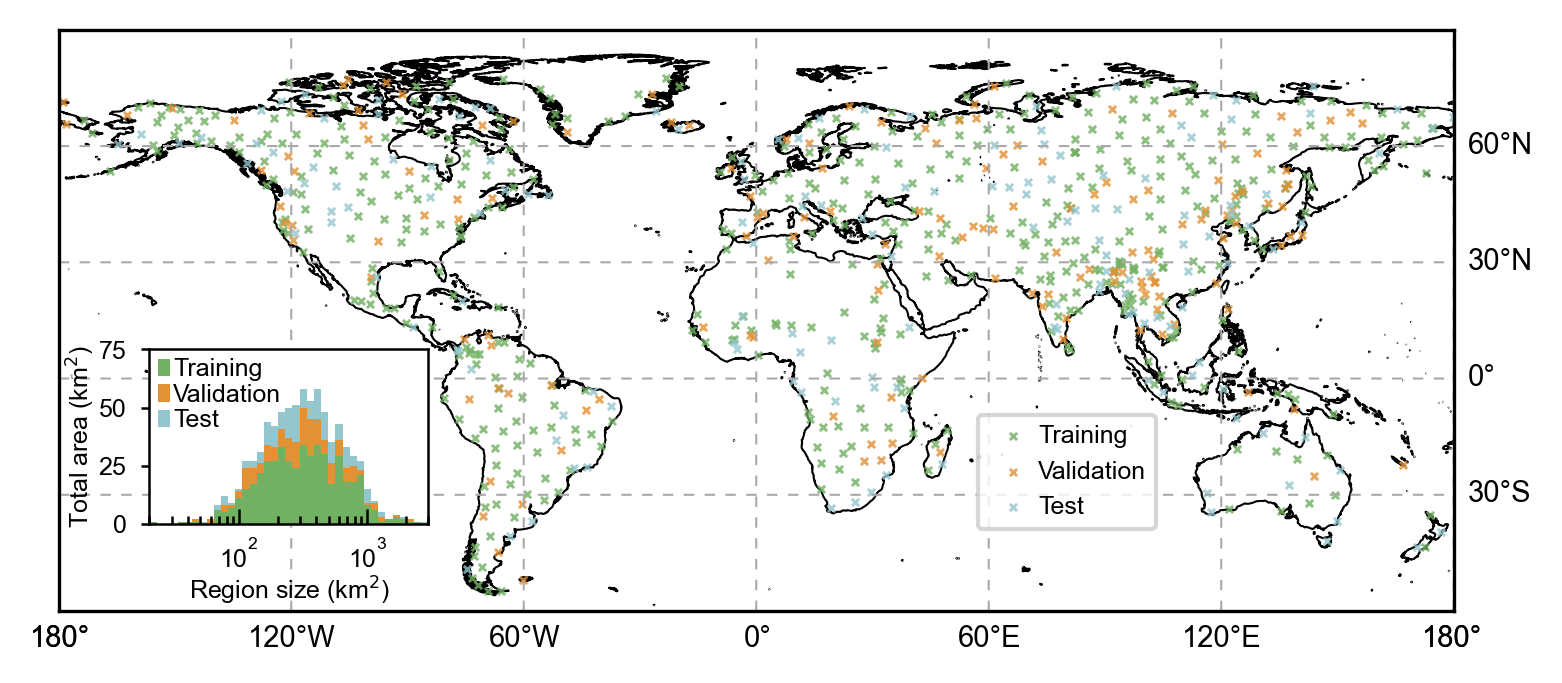

In [9]:
savepic=fig_path+'/Figure_2_sample_distribution.png'
fig=plt.figure(figsize=(6,3),dpi=300)#fig=plt.figure(figsize=(18,7.9))
# gs = gridspec.GridSpec(2,1,height_ratios=[1,1],wspace =0.2,hspace =0)
gs = gridspec.GridSpec(1,1)
ax1=plt.subplot(gs[0, :])
map1 = Basemap( llcrnrlat=-60, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180,ax=ax1)
map1.readshapefile(global_diss[:-4],'global_diss',drawbounds=True,color='k',linewidth=0.5,zorder=1)

map1.drawmeridians(np.arange(0, 360, 60),labels=[0,0,0,1],color='darkgrey', linewidth=0.5,dashes=[5, 5])#绘制经线
map1.drawparallels(np.arange(-30, 90, 30),labels=[0,1,0,0],color='darkgrey', linewidth=0.5,dashes=[5, 5])#绘制纬线

sample_region['centroid'] = sample_region.geometry.centroid
size_column = 'area'
label_column = 'dataset' 

# 提取中心点坐标
x = sample_region['centroid'].x
y = sample_region['centroid'].y

color_mapping = {
    'train':color_list[1],# 'DimGrey',
    'val':color_list[2],#'Grey',
    'test': color_list[3],#'LightGray'
}

# ax1.set_xticks(np.arange(-180, 181, 60))
# ax1.set_yticks(np.arange(-60, 91, 30))
# ax1.set_xticklabels([f'{abs(x)}°W' if x < 0 else f'{abs(x)}°E' for x in np.arange(-180, 181, 60)],fontsize=6) 
# ax1.set_yticklabels([f'{abs(y)}°S' if y < 0 else f'{abs(y)}°N' for y in np.arange(-60, 91, 30)],fontsize=6)
ax1.xaxis.set_tick_params(labeltop=True, labelbottom=False)
plt.tick_params(bottom=True, top=True, left=True, right=True )
# pie_size=[]
# 遍历类别进行绘制
for category, color in color_mapping.items():
    subset = sample_region[sample_region['dataset'] == category]
    if category=='train':
        label='Training'
    elif category=='val':
        label='Validation'
    else:
        label='Test'
    ax1.scatter(
        subset['centroid'].x,
        subset['centroid'].y,
        c=color,
        label=label,  # 为图例添加标签
        s=3,#subset['value'],  # 点大小
        marker='x',
#         edgecolor=color,  # 边框颜色
        linewidth=0.7,
        alpha=0.8
    )
#     pie_size.append(subset['area'].sum())#len(subset)

# 添加图例
ax1.legend(fontsize=6,title=None, loc="lower left",bbox_to_anchor=(0.65, 0.12),frameon=True,handletextpad=0)
total_area=sample_region['area'].sum()
# ax1.text(-175,80,sub_fig_name[0],fontsize=12)
# ax1.text(-30,-55,f'Total region count: {len(sample_region)}\nTotal region area : {total_area:.1f} km$^2$', ha='left', va='bottom',
#         bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.1'))

# ax_pie=ax1.inset_axes((0, 0.1,0.2,0.4)) 
# ax_pie.pie(pie_size, labels=color_mapping.keys(), colors=color_mapping.values(), autopct='%1.1f%%', startangle=140)
# ax_pie.set_xlabel('Total region area')
rect = patches.Rectangle((-180, -60), 70, 60, linewidth=1, edgecolor='none', facecolor='white')
ax1.add_patch(rect)  # 将矩形添加到子图中
ax2 =ax1.inset_axes([0.065,0.15,0.2,0.3])
# ax2.text(30,75,sub_fig_name[1],fontsize=12)
bins=np.logspace(np.log10(20), np.log10(3000), 40)
ax2.hist([train_s['area'],val_s['area'],test_s['area']],bins=bins,stacked=True,color=color_list[1:4],label=['Training', 'Validation', 'Test'])
ax2.set_xscale('log')  # 设置x轴为对数尺度
ax2.set_xlim(20,3000)
ax2.set_ylim(0,75)
# 修改 Y 轴刻度长度
ax2.tick_params(axis='y', length=2,direction='out')  # 设置 Y 轴刻度长度为 10
# ax2.set_xticks([20,100,1000,3000])
ax2.tick_params(axis='both', labelsize=6,width= 0.6)
ax2.set_xlabel('Region size (km$^2$)', labelpad=0.5,fontsize=6)#, backgroundcolor='white'
# ax2.yaxis.label.set_backgroundcolor('white')
ax2.set_ylabel('Total area (km$^2$)', labelpad=0.5,fontsize=6)
ax2.legend(fontsize=6,frameon=False,handlelength=0.5,ncols=1,labelspacing=0.1,handletextpad=0.1,loc="upper left",bbox_to_anchor=(-0.05, 1.08))
# ax2.text(4500,75,sub_fig_name[2],fontsize=12)
for spine in ax2.spines.values():
    spine.set_linewidth(0.6)  # 设置线宽为 3
# ax3=plt.subplot(gs[1, 0])
# map1 = Basemap( llcrnrlat=-60, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180,ax=ax3)
# map1.readshapefile(global_diss[:-4],'global_diss',drawbounds=True,color='k',linewidth=0.5,zorder=1)
# for i in range(5):
#     subset = sample_region[sample_region['type'] == i]
#     label=i
#     ax3.scatter(
#         subset['centroid'].x,
#         subset['centroid'].y,
#         c=color_list[i],
#         label=label,  # 为图例添加标签
#         s=3,#subset['value'],  # 点大小
#         marker='x',
# #         edgecolor=color,  # 边框颜色
#         linewidth=0.7,
#         alpha=0.8
#     )
# #     pie_size.append(subset['area'].sum())#len(subset)

# # 添加图例
# ax3.legend(title='Region type', loc="lower left",bbox_to_anchor=(0.02, 0.02))

# plt.savefig(savepic,dpi=300,bbox_inches='tight')#,dpi=400
# plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_49500\241554500.py:13: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  sample_region['centroid'] = sample_region.geometry.centroid
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


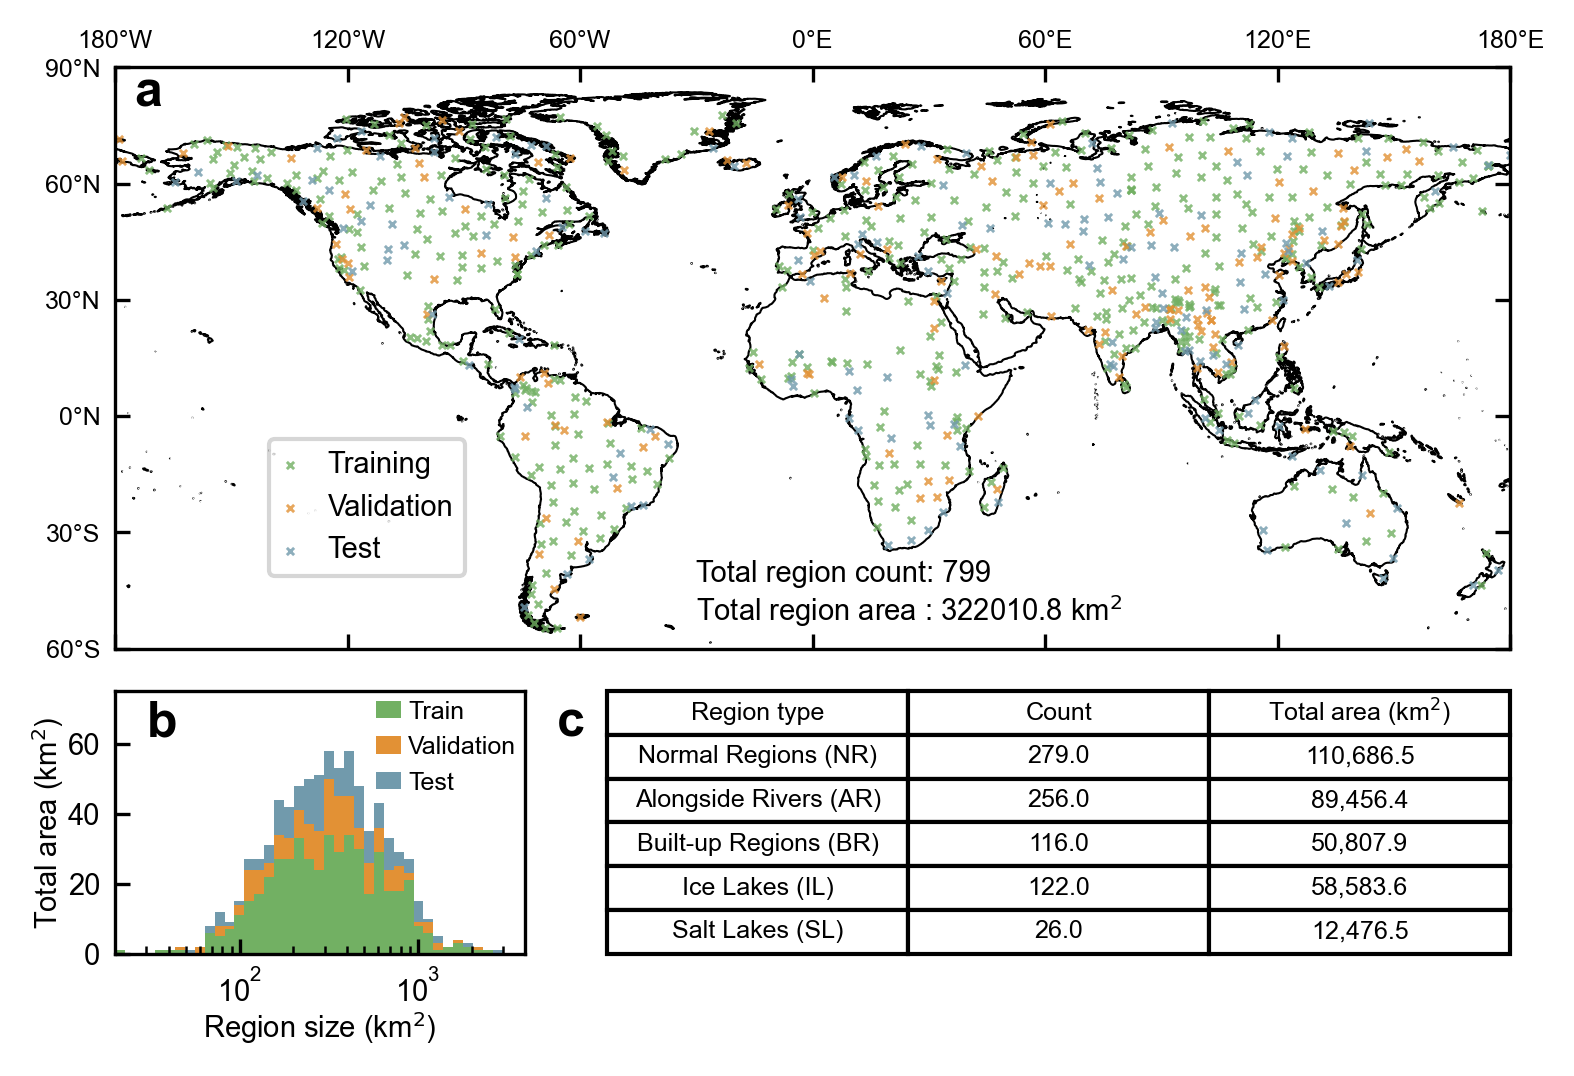

In [18]:
marker_list=['+','x','1','*','4']
# marker_list=['o','v','s','D','p']
savepic=fig_path+'/2-2 region distribution.eps'
fig=plt.figure(figsize=(6,4),dpi=300)#fig=plt.figure(figsize=(18,7.9))
gs = gridspec.GridSpec(2,3,width_ratios=[1,1,1],height_ratios=[2.5,1],wspace =0.2,hspace =0.01)
ax1=plt.subplot(gs[0, :])
map1 = Basemap( llcrnrlat=-60, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180,ax=ax1)
map1.readshapefile(global_diss[:-4],'global_diss',drawbounds=True,color='k',linewidth=0.5,zorder=1)

# map1.drawmeridians(np.arange(0, 360, 60),labels=[0,0,0,1],color='darkgrey', linewidth=0.5,dashes=[5, 5])#绘制经线
# map1.drawparallels(np.arange(-30, 90, 30),labels=[0,1,0,0],color='darkgrey', linewidth=0.5,dashes=[5, 5])#绘制纬线

sample_region['centroid'] = sample_region.geometry.centroid
size_column = 'area'
label_column = 'dataset' 

# 提取中心点坐标
x = sample_region['centroid'].x
y = sample_region['centroid'].y

color_mapping = {
    'train':color_list[1],# 'DimGrey',
    'val':color_list[2],#'Grey',
    'test': color_list[4],#'LightGray'
}
ax1.set_xticks(np.arange(-180, 181, 60))
ax1.set_yticks(np.arange(-60, 91, 30))
ax1.set_xticklabels([f'{abs(x)}°W' if x < 0 else f'{abs(x)}°E' for x in np.arange(-180, 181, 60)],fontsize=6) 
ax1.set_yticklabels([f'{abs(y)}°S' if y < 0 else f'{abs(y)}°N' for y in np.arange(-60, 91, 30)],fontsize=6)
ax1.xaxis.set_tick_params(labeltop=True, labelbottom=False)
plt.tick_params(bottom=True, top=True, left=True, right=True )
# pie_size=[]
# 遍历类别进行绘制
handles=[]
for category, color in color_mapping.items():
    subset = sample_region[sample_region['dataset'] == category]
    for i in range(5):
        subset_s=subset[subset['type'] == i]
        sc=ax1.scatter(
            subset_s['centroid'].x,
            subset_s['centroid'].y,
            c=color,
            s=5,#subset['value'],  # 点大小
            marker=marker_list[i],
            label='',
#             edgecolor=color,  # 边框颜色
#             facecolor='none',
            linewidth=0.6,
            alpha=0.8
        )
        handles.append(sc)
    pie_size.append(subset['area'].sum())#len(subset)

total_area=sample_region['area'].sum()
ax1.text(-175,80,sub_fig_name[0],fontsize=12,weight='bold')
ax1.text(-30,-55,f'Total region count: {len(sample_region)}\nTotal region area : {total_area:.1f} km$^2$', ha='left', va='bottom',
        bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.1'))

# labels=['','','','','','','','','','','NR','AR','BR','IL','SL'] 
ax1.legend(handlelength=0.6, handletextpad=1, loc="lower left",bbox_to_anchor=(0.1, 0.1))
# ax1.legend(handles,labels, handlelength=0.6, handletextpad=1, loc="lower left",bbox_to_anchor=(0.0, 0),ncol=3,title='Train Validation Test      ')

# ax_pie=ax1.inset_axes((0, 0.1,0.2,0.4)) 
# ax_pie.pie(pie_size, labels=color_mapping.keys(), colors=color_mapping.values(), autopct='%1.1f%%', startangle=140)
# ax_pie.set_xlabel('Total region area')

ax2 = plt.subplot(gs[1, 0])
ax2.text(30,62,sub_fig_name[1],fontsize=12,weight='bold')
bins=np.logspace(np.log10(20), np.log10(3000), 40)
ax2.hist([train_s['area'],val_s['area'],test_s['area']],bins=bins,stacked=True,color=[color_list[i] for i in [1,2,4]],label=['Train', 'Validation', 'Test'])
ax2.set_xscale('log')  # 设置x轴为对数尺度
ax2.set_xlim(20,4000)
ax2.set_ylim(0,75)
# ax2.set_xticks([20,100,1000,3000])
ax2.set_xlabel('Region size (km$^2$)', labelpad=0.5)#, backgroundcolor='white'
# ax2.yaxis.label.set_backgroundcolor('white')
ax2.set_ylabel('Total area (km$^2$)', labelpad=0.5)
ax2.text(6000,62,sub_fig_name[2],fontsize=12,weight='bold')
ax2.legend(fontsize=6,frameon=False,handlelength=1,handletextpad=0.3,loc="upper left",bbox_to_anchor=(0.58, 1.05))

ax3=plt.subplot(gs[1, 1:])
table_data=pd.read_excel(r'D:\lakemapping\10_paper_writting\figure\train_data_distribution.xlsx',sheet_name='five_type')
# 设置千分位分隔符
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')  # 根据你的系统区域设置进行调整
# 格式化数值为千分位分隔符
formatted_data = table_data.applymap(lambda x: locale.format_string("%.1f", x, grouping=True) if isinstance(x, (int, float)) else x)

table=ax3.table(cellText=formatted_data.values, colLabels=formatted_data.columns, loc='bottom', cellLoc='center', bbox=[0.0, 0, 1.0, 1])
table[(0, 2)].set_text_props(text='Total area (km$^2$)')
ax3.set_axis_off()

# plt.savefig(savepic,dpi=300,bbox_inches='tight')#,dpi=400
# plt.show()

In [ ]:
print(sample_region['area'].min())

In [131]:
label=r'D:\lakemapping\10_paper_writting\figure\test_dataset_evalution\v10\label_with_TP.shp'
label=gpd.read_file(label)
label

,L_area,FN_area,omission,recall,type,geometry
0,0.000064,0.000064,1.000000,0.000000,4,"POLYGON Z ((60.89185 49.95711 0.00000, 60.8917..."
1,0.033371,0.033371,1.000000,0.000000,4,"POLYGON Z ((60.86607 49.94624 0.00000, 60.8651..."
2,2.351495,0.477072,0.202880,0.797120,4,"POLYGON Z ((60.87973 49.94489 0.00000, 60.8792..."
3,0.000064,0.000064,1.000000,0.000000,4,"POLYGON Z ((60.87928 49.94480 0.00000, 60.8791..."
4,0.011468,0.011468,0.999997,0.000003,4,"POLYGON Z ((60.87559 49.94372 0.00000, 60.8754..."
...,...,...,...,...,...,...
46237,0.401971,0.030594,0.076110,0.923890,4,"POLYGON Z ((76.22322 51.33548 0.00000, 76.2233..."
46238,0.001127,0.001127,1.000000,0.000000,4,"POLYGON Z ((76.29760 51.30072 0.00000, 76.2976..."
46239,0.002631,0.002631,0.999850,0.000150,4,"POLYGON Z ((76.29113 51.28680 0.00000, 76.2911..."
46240,3.031798,2.161178,0.712837,0.287163,4,"POLYGON Z ((76.28862 51.30413 0.00000, 76.2886..."


In [132]:
label['TP_area']=label['L_area']-label['FN_area']
label

,L_area,FN_area,omission,recall,type,geometry,TP_area
0,0.000064,0.000064,1.000000,0.000000,4,"POLYGON Z ((60.89185 49.95711 0.00000, 60.8917...",-4.097687e-07
1,0.033371,0.033371,1.000000,0.000000,4,"POLYGON Z ((60.86607 49.94624 0.00000, 60.8651...",-6.310790e-08
2,2.351495,0.477072,0.202880,0.797120,4,"POLYGON Z ((60.87973 49.94489 0.00000, 60.8792...",1.874423e+00
3,0.000064,0.000064,1.000000,0.000000,4,"POLYGON Z ((60.87928 49.94480 0.00000, 60.8791...",-4.260468e-07
4,0.011468,0.011468,0.999997,0.000003,4,"POLYGON Z ((60.87559 49.94372 0.00000, 60.8754...",3.678930e-08
...,...,...,...,...,...,...,...
46237,0.401971,0.030594,0.076110,0.923890,4,"POLYGON Z ((76.22322 51.33548 0.00000, 76.2233...",3.713772e-01
46238,0.001127,0.001127,1.000000,0.000000,4,"POLYGON Z ((76.29760 51.30072 0.00000, 76.2976...",-5.407388e-08
46239,0.002631,0.002631,0.999850,0.000150,4,"POLYGON Z ((76.29113 51.28680 0.00000, 76.2911...",3.936058e-07
46240,3.031798,2.161178,0.712837,0.287163,4,"POLYGON Z ((76.28862 51.30413 0.00000, 76.2886...",8.706200e-01


In [133]:
prediction=r'D:\lakemapping\10_paper_writting\figure\test_dataset_evalution\v10\prediction_with_TP.shp'
prediction=gpd.read_file(prediction)
prediction

,P_area,FP_area,commission,precision,type,iwR,River_mask,area_ratio,AR,flag,geometry
0,0.000098,0.000098,1.000000,0.000000e+00,0,0.0,0,1,1.0,0.0,"POLYGON Z ((-49.90644 -9.36961 0.00000, -49.90..."
1,0.001176,0.000000,0.000000,1.000000e+00,0,NaN,0,1,1.0,NaN,"POLYGON Z ((-49.90312 -9.37284 0.00000, -49.90..."
2,0.000098,0.000000,0.000000,1.000000e+00,0,NaN,0,1,1.0,NaN,"POLYGON Z ((-49.90285 -9.37293 0.00000, -49.90..."
3,0.000294,0.000000,0.000000,1.000000e+00,0,NaN,0,1,1.0,NaN,"POLYGON Z ((-49.90285 -9.37293 0.00000, -49.90..."
4,0.000588,0.000588,1.000000,3.180000e-10,0,NaN,0,1,1.0,NaN,"POLYGON Z ((-49.92486 -9.37419 0.00000, -49.92..."
...,...,...,...,...,...,...,...,...,...,...,...
54345,0.057440,0.000337,0.005862,9.941384e-01,4,NaN,0,1,1.0,2.0,"POLYGON Z ((69.65905 47.70494 0.00000, 69.6590..."
54346,0.056906,0.000808,0.014201,9.857988e-01,4,NaN,0,1,1.0,NaN,"POLYGON Z ((69.79829 47.70036 0.00000, 69.7982..."
54347,0.058145,0.000000,0.000000,1.000000e+00,4,NaN,0,1,1.0,2.0,"POLYGON Z ((69.64513 47.67566 0.00000, 69.6451..."
54348,0.000607,0.000607,1.000000,2.210000e-10,4,NaN,0,1,1.0,NaN,"POLYGON Z ((69.79775 47.65634 0.00000, 69.7977..."


In [134]:
prediction['TP_area']=prediction['P_area']-prediction['FP_area']

In [195]:
# bins=[0.001,0.005,0.01,0.1,1,20]
bins=[0.0001,0.001,0.005,0.01,0.1,1,20]
# bins=np.logspace(-3, np.log10(label_with_omission['L_area'].max()), 27)
bin_labels=bins[1:]
label['bin']=pd.cut(label['L_area'],bins=bins, labels=bin_labels,right=False)
label_statistics=label.groupby('bin')['recall'].agg(['count', 'mean']).reset_index()
label_statistics

# x=label['L_area']
# y=label['TP_area']
# x_and_y = np.vstack([x, y])
# kde = gaussian_kde(x_and_y)
# z = kde(x_and_y)
# idx = z.argsort()
# L_x, L_y, L_z = x[idx], y[idx], z[idx]

,bin,count,mean
0,0.001,13695,0.604912
1,0.005,13339,0.779251
2,0.010,4883,0.861826
3,0.100,8742,0.918103
4,1.000,2117,0.955195
5,20.000,245,0.930944


In [196]:
# bins=np.logspace(np.log10(20), np.log10(3000), 40)

In [197]:
prediction['bin']=pd.cut(prediction['P_area'],bins=bins, labels=bin_labels,right=False)
prediction_statistics=prediction.groupby('bin')['precision'].agg(['count', 'mean']).reset_index()
prediction_statistics

# x=prediction['P_area']
# y=prediction['TP_area']
# x_and_y = np.vstack([x, y])
# kde = gaussian_kde(x_and_y)
# z = kde(x_and_y)
# idx = z.argsort()
# P_x, P_y, P_z = x[idx], y[idx], z[idx]

,bin,count,mean
0,0.001,16409,0.527700
1,0.005,14064,0.753876
2,0.010,4968,0.862253
3,0.100,8883,0.912296
4,1.000,2197,0.945664
5,20.000,240,0.949483


In [137]:
area=label.groupby('bin')['L_area'].agg([ 'sum']).reset_index()
area

,bin,sum
0,0.001,6.673013
1,0.005,32.661638
2,0.010,34.820077
3,0.050,156.801157
4,0.100,120.635490
5,1.000,600.149251
6,20.000,547.908668


In [138]:
def calculate(y_obs, y_pred):
    slope, intercept, r_value, p_value, std_err = stats.linregress(y_obs, y_pred)
    r_squared = r_value ** 2  # R²

    # 2. 计算 MBE（Mean Bias Error）
    mbe = np.mean(y_pred - y_obs)

    # 3. 计算 PBIAS（Percent Bias）
    pbias = (np.sum(y_pred - y_obs) / np.sum(y_obs)) * 100
    
    return slope,r_squared,mbe,pbias

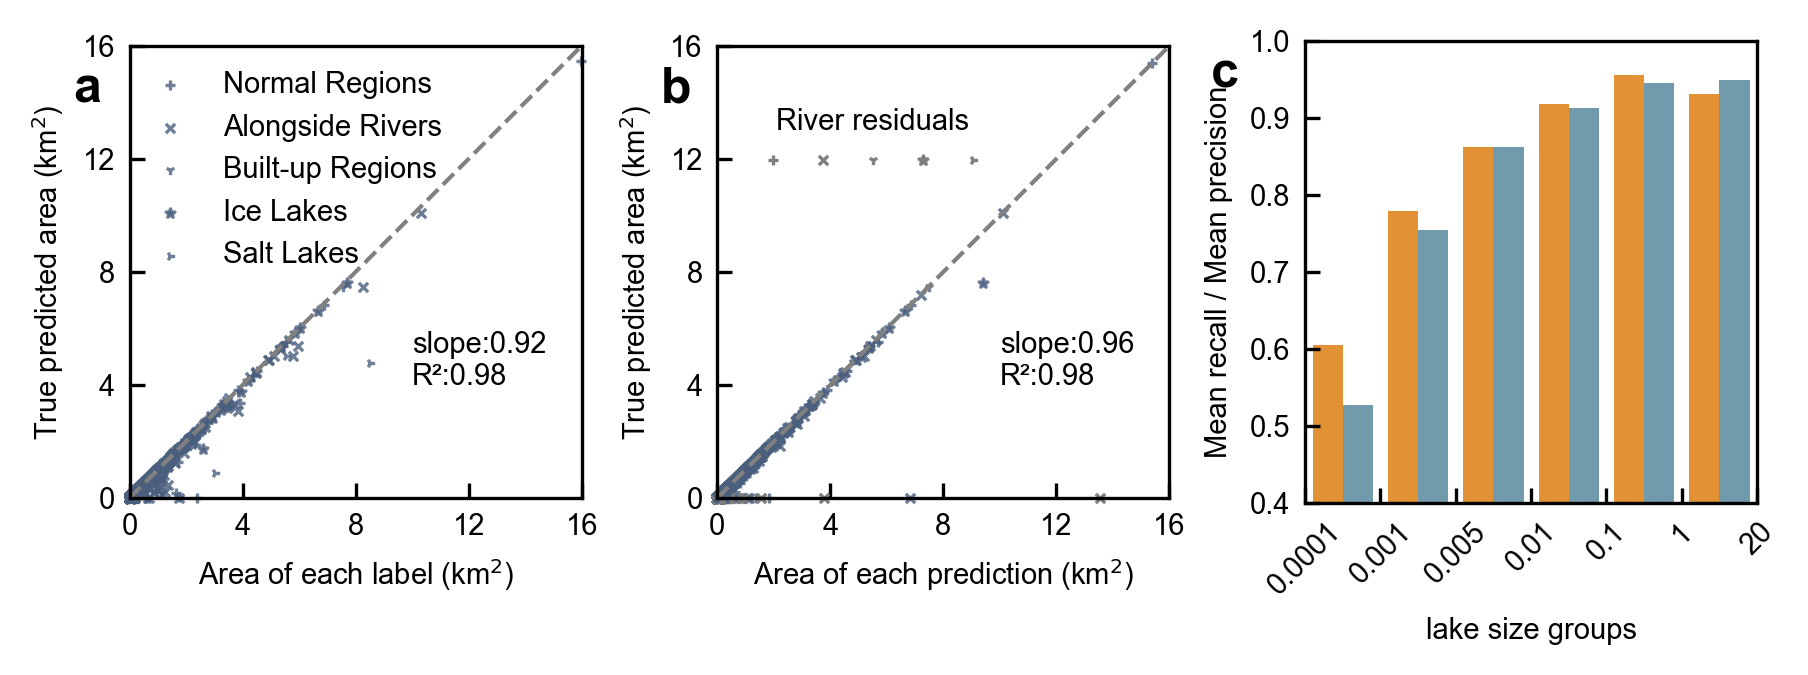

In [201]:
excel_file=r'D:\lakemapping\10_paper_writting\figure\iew_0_prediction_label_evalution_v10.xls'
# shapes =['o','v','x','+']
shapes =['+','x','1','*','4']
clist=color_list[1:]
labels=['Normal Regions','Alongside Rivers','Built-up Regions','Ice Lakes','Salt Lakes']
maxlim=16
my_cmap = "Spectral_r"
bin_num=len(bins)-1
savepic=fig_path+'/Figure5_validation.png'
fig=plt.figure(figsize=(7,2),dpi=300)#fig=plt.figure(figsize=(18,7.9))
gs = gridspec.GridSpec(1,3,width_ratios=[1,1,1],hspace=1,wspace =0.3)
ax1=plt.subplot(gs[0,0])
ax1.text(-2,14,sub_fig_name[0],fontsize=12,weight='bold')
x_vals = np.linspace((0, maxlim+1), 1)  # 生成对角线的 x 值
y_vals = x_vals  # 对角线 y = x
ax1.plot(x_vals, y_vals, color='grey', linestyle='--',linewidth=1)

for t in range(0,5):
    # 选择当前类型的数据
    label_subset = label[label['type'] == t]
    ax1.scatter(label_subset['L_area'], label_subset['TP_area'],s=5,c=color_list[5],alpha=0.8,marker=shapes[t], label=labels[t],clip_on=False,linewidth=0.8)
# ax1.scatter(L_x, L_y, c=L_z,s=1, cmap=my_cmap) 
slope,r_squared,mbe,pbias=calculate(label['L_area'], label['TP_area'])
ax1.text(10,4,f'slope:{slope:.2f}\nR\u00b2:{r_squared:.2f}')# \nMBE:{mbe:.2f}\nPBIAS:{pbias:.2f}

ax1.set_xlabel('Area of each label (km$^2$)')
ax1.set_ylabel('True predicted area (km$^2$)')
ax1.set_aspect('equal')  # 设置长宽比 1:1
ax1.set_xlim(0,maxlim)
ax1.set_ylim(0,maxlim)
ax1.set_xticks(range(0,maxlim+1,4))
ax1.set_yticks(np.arange(0,maxlim+1,4))
ax1.set_axisbelow(True)
ax1.axvline(0.005, color='blue', linewidth=0.6, linestyle='--')
ax1.legend(loc=[0,0.48],frameon=False)

ax2=plt.subplot(gs[0, 1])
ax2.text(-2,14,sub_fig_name[1],fontsize=12,weight='bold')
ax2.plot(x_vals, y_vals, color='grey', linestyle='--',linewidth=1)
# ax2.axhline(0.005, color='black', linewidth=1)
handles=[]
for t in range(0,5):
    # 选择当前类型的数据
    subset = prediction[(prediction['type'] == t) & (prediction['River_mask']==0)]
    river_residual=prediction[(prediction['type'] == t) & (prediction['River_mask']==1)]
    ax2.scatter(subset['P_area'], subset['TP_area'],s=5,c=color_list[5],marker=shapes[t],alpha=0.8,label=labels[t],clip_on=False,linewidth=0.8)
    scatter=ax2.scatter(river_residual['P_area'], river_residual['TP_area'],s=5,c='grey',marker=shapes[t], label=labels[t],clip_on=False,linewidth=0.8)
    handles.append(scatter)
    
data=prediction[prediction['River_mask']==0]
slope,r_squared,mbe,pbias=calculate(data['P_area'], data['TP_area'])
ax2.text(10,4,f'slope:{slope:.2f}\nR\u00b2:{r_squared:.2f}') #\nMBE:{mbe:.2f}\nPBIAS:{pbias:.2f}
ax2.set_xlim(0,maxlim)
ax2.set_ylim(0,maxlim)
ax2.set_xticks(range(0,maxlim+1,4))
ax2.set_yticks(np.arange(0,maxlim+1,4))
ax2.set_xlabel('Area of each prediction (km$^2$)')
ax2.set_ylabel('True predicted area (km$^2$)')
ax2.set_aspect('equal')  # 设置长宽比 1:1
ax2.set_axisbelow(True)
plt.tick_params(labelbottom=True,labeltop=False,labelleft=True, labelright=False)
# ax2.text(1, 12, r'+ x y :River residuals', color='grey', ha='left', va='bottom')  # 空心圆圈
# plt.text(0, 0, r'$\circ$ Normal Lake $\triangledown$ Alongside River + Built-up Area $\times$ Ice Lake', fontsize=6, color='black', ha='left', va='bottom')  # 空心圆圈
l=['','','','','']
ax2.legend(handles,l,title='River residuals',handlelength=0, handletextpad=0,loc=[0.1,0.7],ncol=5,fontsize=6,frameon=False)

ax3 = plt.subplot(gs[0,2])
ax3.text(-1.75,0.94,sub_fig_name[2],fontsize=12,weight='bold')
ax3.bar(np.arange(-0.2,bin_num-1,1), label_statistics['mean'], color=color_list[2],width=0.4, label='Mean recall')
ax3.set_ylabel('Mean recall / Mean precision')
ax3.set_xticks(np.arange(-0.5,bin_num,1))
ax3.set_xlim(-0.5,bin_num-0.5)
ax3.set_ylim(0.4,1)
ax3.set_xticklabels(bins,rotation=45)
ax3.set_xlabel('lake size groups')
# ax33 = ax3.twinx()
# ax33.set_ylim(0.4,1)
ax3.bar(np.arange(0.2,bin_num,1),prediction_statistics['mean'],width=0.4, color=color_list[4], label='Mean precision')
# ax3.legend( loc="lower left")
# 绘制第二个柱状图（右侧 y 轴）
# ax33.set_ylabel('Mean precision', color = color_list[5])
# ax33.spines['right'].set_color(color_list[5])
# ax33.tick_params(axis = 'y', colors = color_list[5])
plt.savefig(savepic,dpi=300,bbox_inches='tight')#,dpi=400
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


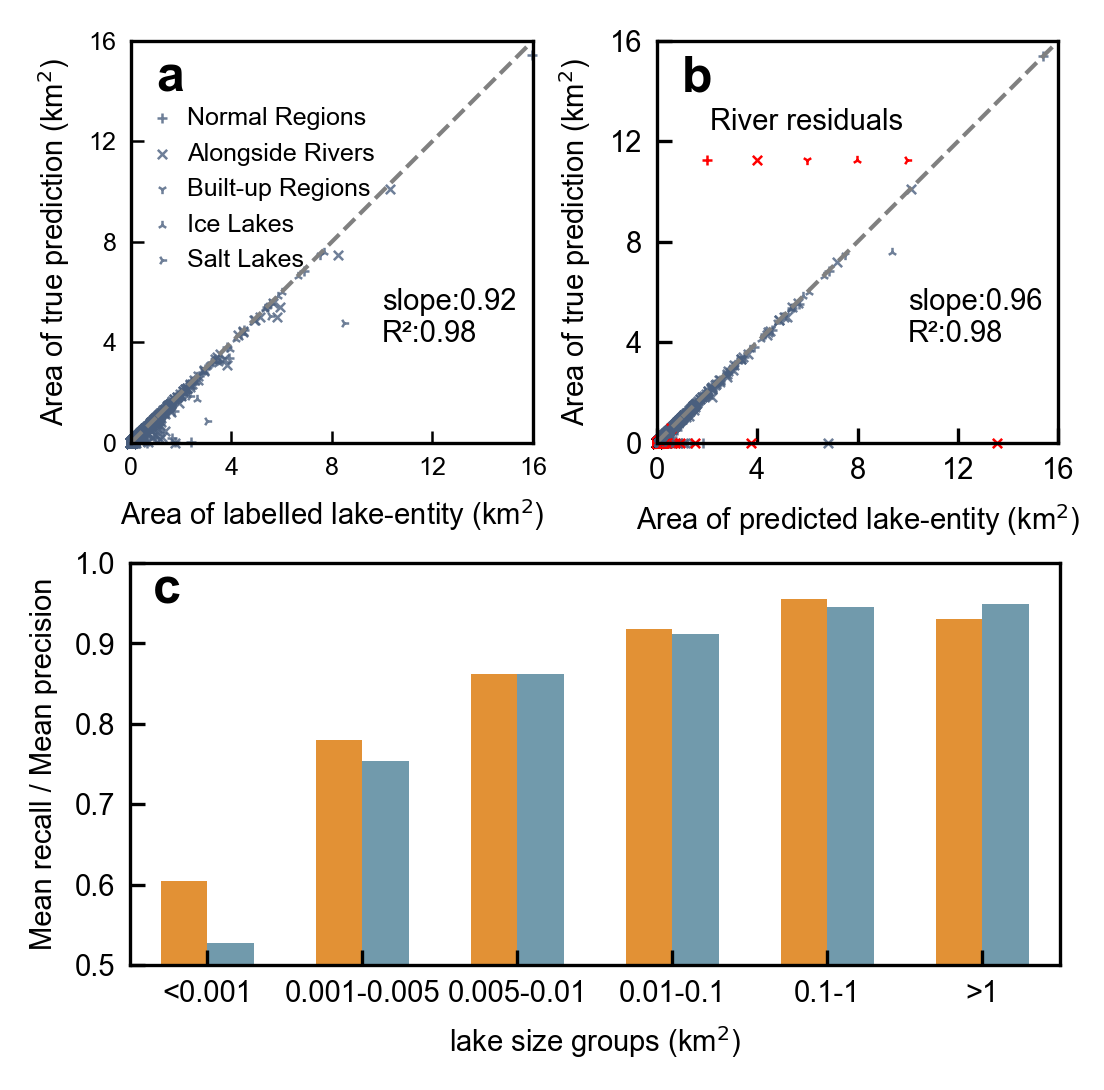

In [226]:
excel_file=r'D:\lakemapping\10_paper_writting\figure\iew_0_prediction_label_evalution_v10.xls'
# shapes =['o','v','x','+']
shapes =['+','x','1','2','4']
clist=color_list[1:]
labels=['Normal Regions','Alongside Rivers','Built-up Regions','Ice Lakes','Salt Lakes']
# labels=['NR','AR','BR','IL','SL']
maxlim=16
my_cmap = "Spectral_r"

savepic=fig_path+'/Figure5_validation_2.eps'
fig=plt.figure(figsize=(4,4),dpi=300)#fig=plt.figure(figsize=(18,7.9))
gs = gridspec.GridSpec(2,2,width_ratios=[1,1],height_ratios=[1,1],hspace=0.3,wspace =0.3)
ax1=plt.subplot(gs[0,0])
ax1.text(1,14,sub_fig_name[0],fontsize=12,weight='bold')
x_vals = np.linspace((0, maxlim+1), 1)  # 生成对角线的 x 值
y_vals = x_vals  # 对角线 y = x
ax1.plot(x_vals, y_vals, color='grey', linestyle='--',linewidth=1)

for t in range(0,5):
    # 选择当前类型的数据
    label_subset = label[label['type'] == t]
    ax1.scatter(label_subset['L_area'], label_subset['TP_area'],s=5,c=color_list[5],alpha=0.8,marker=shapes[t], label=labels[t],clip_on=False,linewidth=0.6)
# ax1.scatter(L_x, L_y, c=L_z,s=1, cmap=my_cmap) 
slope,r_squared,mbe,pbias=calculate(label['L_area'], label['TP_area'])
ax1.text(10,4,f'slope:{slope:.2f}\nR\u00b2:{r_squared:.2f}')# \nMBE:{mbe:.2f}\nPBIAS:{pbias:.2f}

ax1.set_xlabel('Area of labelled lake-entity (km$^2$)')
ax1.set_ylabel('Area of true prediction (km$^2$)')
ax1.set_aspect('equal')  # 设置长宽比 1:1
ax1.set_xlim(0,maxlim)
ax1.set_ylim(0,maxlim)
ax1.set_xticks(range(0,maxlim+1,4))
ax1.set_yticks(np.arange(0,maxlim+1,4))
ax1.set_axisbelow(True)
ax1.tick_params(axis='both', labelsize=6,width= 0.6,length=3)
ax1.axvline(0.005, color='blue', linewidth=0.6, linestyle='--')
ax1.legend(loc=[-0.01,0.4],frameon=False,fontsize=6,handletextpad=0)

ax2=plt.subplot(gs[0, 1])
ax2.text(1,14,sub_fig_name[1],fontsize=12,weight='bold')
ax2.plot(x_vals, y_vals, color='grey', linestyle='--',linewidth=1)
# ax2.axhline(0.005, color='black', linewidth=1)
handles=[]
for t in range(0,5):
    # 选择当前类型的数据
    subset = prediction[(prediction['type'] == t) & (prediction['River_mask']==0)]
    river_residual=prediction[(prediction['type'] == t) & (prediction['River_mask']==1)]
    ax2.scatter(subset['P_area'], subset['TP_area'],s=5,c=color_list[5],marker=shapes[t],alpha=0.8,label=labels[t],clip_on=False,linewidth=0.6)
    scatter=ax2.scatter(river_residual['P_area'], river_residual['TP_area'],s=5,c='red',marker=shapes[t], label=labels[t],clip_on=False,linewidth=0.6)
    handles.append(scatter)
    
data=prediction[prediction['River_mask']==0]
slope,r_squared,mbe,pbias=calculate(data['P_area'], data['TP_area'])
ax2.text(10,4,f'slope:{slope:.2f}\nR\u00b2:{r_squared:.2f}') #\nMBE:{mbe:.2f}\nPBIAS:{pbias:.2f}
ax2.set_xlim(0,maxlim)
ax2.set_ylim(0,maxlim)
ax2.set_xticks(range(0,maxlim+1,4))
ax2.set_yticks(np.arange(0,maxlim+1,4))
ax2.set_xlabel('Area of predicted lake-entity (km$^2$)')
ax2.set_ylabel('Area of true prediction (km$^2$)')
ax2.set_aspect('equal')  # 设置长宽比 1:1
ax2.set_axisbelow(True)
plt.tick_params(labelbottom=True,labeltop=False,labelleft=True, labelright=False)
# ax2.text(1, 12, r'+ x y :River residuals', color='grey', ha='left', va='bottom')  # 空心圆圈
# plt.text(0, 0, r'$\circ$ Normal Lake $\triangledown$ Alongside River + Built-up Area $\times$ Ice Lake', fontsize=6, color='black', ha='left', va='bottom')  # 空心圆圈
l=['','','','','']
ax2.legend(handles,l,title='River residuals',handlelength=0, handletextpad=0,loc=[0.1,0.65],ncol=5,fontsize=6,frameon=False)

ax3 = plt.subplot(gs[1,:])
ax3.text(-0.35,0.95,sub_fig_name[2],fontsize=12,weight='bold')
ax3.bar(np.arange(-0.15,bin_num-1,1), label_statistics['mean'], color=color_list[2],width=0.3, label='Mean recall')
ax3.set_ylabel('Mean recall / Mean precision')
ax3.set_xticks(range(0,bin_num))
ax3.set_xlim(-0.5,bin_num-0.5)
ax3.set_ylim(0.5,1)
# ax3.set_xticklabels(['<0.001','0.001~0.005','0.005`0.01','0.01-0.05','0.05-0.1','0.1-1','>1'],rotation=45)
# ax3.set_xticklabels(['<0.005','0.005-0.01','0.01-0.03','0.03-0.1','0.1-1','>1'])
ax3.set_xticklabels(['<0.001','0.001-0.005','0.005-0.01','0.01-0.1','0.1-1','>1'])
ax3.set_xlabel('lake size groups (km$^2$)')
# ax33 = ax3.twinx()
# ax33.set_ylim(0.4,1)
ax3.bar(np.arange(0.15,bin_num,1),prediction_statistics['mean'],width=0.3, color=color_list[4], label='Mean precision')
# 绘制第二个柱状图（右侧 y 轴）
# ax33.set_ylabel('Mean precision', color = color_list[5])
# ax33.spines['right'].set_color(color_list[5])
# ax33.tick_params(axis = 'y', colors = color_list[5])
plt.savefig(savepic,dpi=300,bbox_inches='tight')#,dpi=400
plt.show()

In [ ]:
excel_file=r'D:\lakemapping\4_prediction\model0130\sampleV10\iew100_prediction_label_evaluation.xls'
# shapes =['o','v','x','+']
shapes =['.','*','v','+']
clist=color_list[1:]
labels=['Normal Lake','Alongside River','Built-up Area','Ice Lake']
maxlim=16
my_cmap = "Spectral_r"

savepic=fig_path+'/2-2 lake-entity level mean recall and precision.png'
fig=plt.figure(figsize=(7,2),dpi=300)#fig=plt.figure(figsize=(18,7.9))
gs = gridspec.GridSpec(1,4,width_ratios=[1,1,0.1,1],wspace =0.1)
ax1=plt.subplot(gs[0,0])
ax1.text(1,14,sub_fig_name[0],fontsize=12)
x_vals = np.linspace((0, maxlim+1), 1)  # 生成对角线的 x 值
y_vals = x_vals  # 对角线 y = x
ax1.plot(x_vals, y_vals, color='grey', linestyle='--',linewidth=1)

for t in range(0,4):
    # 选择当前类型的数据
    label_subset = label[label['type'] == t]
    ax1.scatter(label_subset['L_area'], label_subset['TP_area'],s=5,c=color_list[5],alpha=0.8,marker=shapes[t], label=labels[t],clip_on=False,linewidth=0.5)
# ax1.scatter(L_x, L_y, c=L_z,s=1, cmap=my_cmap) 
slope,r_squared,mbe,pbias=calculate(label['L_area'], label['TP_area'])
ax1.text(10,4,f'slope:{slope:.2f}\nR\u00b2:{r_squared:.2f}')# \nMBE:{mbe:.2f}\nPBIAS:{pbias:.2f}

ax1.set_xlabel('Area of each label (km$^2$)')
ax1.set_ylabel('True predicted area (km$^2$)')
ax1.set_aspect('equal')  # 设置长宽比 1:1
ax1.set_xlim(0,maxlim)
ax1.set_ylim(0,maxlim)
ax1.set_xticks(range(0,maxlim+1,4))
ax1.set_yticks(np.arange(0,maxlim+1,4))
ax1.set_axisbelow(True)
ax1.axvline(0.005, color='blue', linewidth=0.6, linestyle='--')
ax1.legend(loc=[0,0.48],frameon=False)

ax2=plt.subplot(gs[0, 1])
ax2.text(1,14,sub_fig_name[1],fontsize=12)
ax2.plot(x_vals, y_vals, color='grey', linestyle='--',linewidth=1)
# ax2.axhline(0.005, color='black', linewidth=1)

for t in range(0,4):
    # 选择当前类型的数据
    subset = prediction[(prediction['type'] == t) & (prediction['River_mask']==0)]
    river_residual=prediction[(prediction['type'] == t) & (prediction['River_mask']==1)]
    ax2.scatter(subset['P_area'], subset['TP_area'],s=5,c=color_list[5],marker=shapes[t],alpha=0.8,label=labels[t],clip_on=False,linewidth=0.5)
    ax2.scatter(river_residual['P_area'], river_residual['TP_area'],s=5,c='grey',marker=shapes[t], label=labels[t],clip_on=False,linewidth=0.5)
   
data=prediction[prediction['River_mask']==0]
slope,r_squared,mbe,pbias=calculate(data['P_area'], data['TP_area'])
ax2.text(10,4,f'slope:{slope:.2f}\nR\u00b2:{r_squared:.2f}') #\nMBE:{mbe:.2f}\nPBIAS:{pbias:.2f}
ax2.set_xlim(0,maxlim)
ax2.set_ylim(0,maxlim)
ax2.set_xticks(range(0,maxlim+1,4))
ax2.set_yticks(np.arange(0,maxlim+1,4))
ax2.set_xlabel('Area of each predicted polygon (km$^2$)')
# ax2.set_ylabel('True prediction (km$^2$)')
ax2.set_aspect('equal')  # 设置长宽比 1:1
ax2.set_axisbelow(True)
plt.tick_params(labelbottom=True,labeltop=False,labelleft=False, labelright=False)
ax2.text(1, 12, r'$\bullet$ $\star$ $\triangledown$ + :River residuals', color='grey', ha='left', va='bottom')  # 空心圆圈
# plt.text(0, 0, r'$\circ$ Normal Lake $\triangledown$ Alongside River + Built-up Area $\times$ Ice Lake', fontsize=6, color='black', ha='left', va='bottom')  # 空心圆圈

ax3 = plt.subplot(gs[0,3])
ax3.text(1,0.94,sub_fig_name[2],fontsize=12)
ax3.bar(np.arange(-0.2,6,1), label_statistics['mean'], color=color_list[2],width=0.4, label='Series2')
ax3.set_ylabel('Mean recall')
ax3.set_xticks(np.arange(-0.5,7,1))
ax3.set_xlim(0.5,6.5)
ax3.set_ylim(0.5,1)
ax3.set_xticklabels(bins,rotation=45)
ax3.set_xlabel('lake size groups')

ax33 = ax3.twinx()
ax33.set_ylim(0.5,1)
ax33.bar(np.arange(0.2,7,1),prediction_statistics['mean'],width=0.4, color=color_list[4], label='Series1')
# 绘制第二个柱状图（右侧 y 轴）
ax33.set_ylabel('Mean precision', color = color_list[5])
ax33.spines['right'].set_color(color_list[5])
ax33.tick_params(axis = 'y', colors = color_list[5])
plt.savefig(savepic,dpi=300,bbox_inches='tight')#,dpi=400
plt.show()

In [ ]:
river_residual